In [10]:
# Function to read the static file
def read_static(static_file):
    with open(static_file, 'r') as f:
        num_particles = int(f.readline().strip())
        square_side_length = float(f.readline().strip())
        particles = []
        for _ in range(num_particles):
            radius, prop = map(float, f.readline().strip().split())
            particles.append({'radius': radius, 'prop': prop})
    return square_side_length, particles

# Function to read the dynamic file
def read_dynamic(dynamic_file):
    with open(dynamic_file, 'r') as f:
        positions = []
        f.readline()  # skip first line
        for line in f:
            x, y = map(float, line.strip().split()[:2])
            positions.append({'x': x, 'y': y})
    return positions

# Function to read the output file
def read_output(output_file):
    with open(output_file, 'r') as f:
        #execution_time = float(f.readline().strip())  # read exec time
        neighbors = {}
        for line in f:
            parts = line.strip().split()
            index = int(parts[0])
            if len(parts) == 2 and parts[1]:
                neighbor_list = parts[1]
                neighbors[index] = list(map(int, neighbor_list.split(', ')))
            else:
                neighbors[index] = []
    return neighbors

static_file = "ArchivosEjemplo/Static100.txt"
dynamic_file = "ArchivosEjemplo/Dynamic100.txt"
output_file = "output"

In [11]:
square_side_length, particles = read_static(static_file)
positions = read_dynamic(dynamic_file)
neighbors = read_output(output_file)

In [13]:
square_side_length, particles, positions , neighbors

(100.0,
 [{'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  {'radius': 0.37, 'prop': 1.0},
  

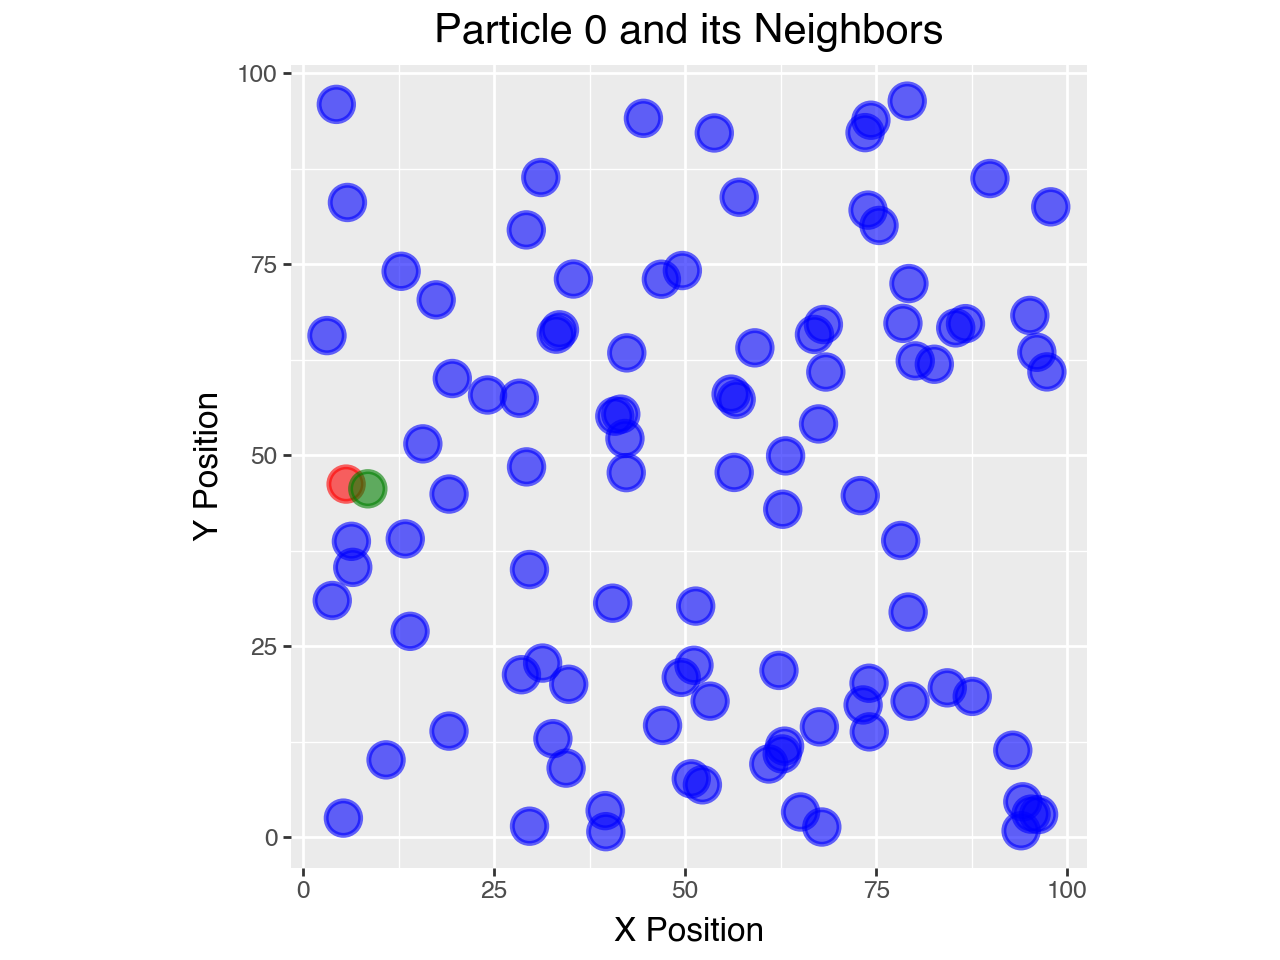

In [17]:
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_path, geom_text, theme, element_text, labs, scale_size, \
    scale_color_manual, coord_fixed
import numpy as np

def plot_particle_with_neighbors(positions, particles, neighbors, particle_id, rc=0):
    data = pd.DataFrame({
        'x': [pos['x'] for pos in positions],
        'y': [pos['y'] for pos in positions],
        'size': [particle['radius'] for particle in particles],
        'color': ['blue'] * len(positions),
    })
    data['index'] = data.index.astype(str)

    # Set colors for selected particle and its neighbors
    data.at[particle_id, 'color'] = 'green'
    for neighbor_id in neighbors.get(particle_id, []):
        data.at[neighbor_id, 'color'] = 'red'

    # Reorder data to move the selected particle to the end
    selected_particle = data.loc[[particle_id]]
    data = pd.concat([data.drop(particle_id), selected_particle])

    rc_i = rc + particles[particle_id]['radius']
    circle_alpha = 1 if rc > 0 else 0
    circle = pd.DataFrame({
        'x': selected_particle['x'].values[0] + rc_i * np.cos(np.linspace(0, 2 * np.pi, 100)),
        'y': selected_particle['y'].values[0] + rc_i * np.sin(np.linspace(0, 2 * np.pi, 100))
    })

    p = (ggplot(data, aes(x='x', y='y'))
         + geom_point(aes(size='size', color='color'), alpha=0.6, stroke=1)
         #+ geom_text(aes(label='index'), nudge_y=0.1, size=8, color='black')
         #+ geom_path(aes(x='x', y='y'), data=circle, color='#fdc086', alpha=circle_alpha, size=1)
         + scale_color_manual(values={'blue': 'blue', 'red': 'red', 'green': 'green'})
         + labs(title=f"Particle {particle_id} and its Neighbors", x="X Position", y="Y Position")
         + theme(legend_position='none',
                 plot_title=element_text(size=15, face='bold'),
                 axis_title_x=element_text(size=12),
                 axis_title_y=element_text(size=12))
         + coord_fixed()
        )

    p.show()

plot_particle_with_neighbors(positions, particles, neighbors, 0, 1)